In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [9]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [10]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities1 = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities1:
        cities1.append(city)

# Print the city count to confirm sufficient count
len(cities1)

637

In [12]:
request=requests.get('https://api.openweathermap.org/data/2.5/weather?q=London&appid=833be512efa8361cca736bbeaf6656de').json()

In [13]:
request

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 276.56,
  'feels_like': 272.06,
  'temp_min': 273.71,
  'temp_max': 279.15,
  'pressure': 1030,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 70},
 'clouds': {'all': 3},
 'dt': 1585689527,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1585633030,
  'sunset': 1585679501},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [14]:
cities1

['punta arenas',
 'hermanus',
 'klaksvik',
 'sao joao da barra',
 'hualmay',
 'cape town',
 'kyra',
 'grand river south east',
 'bredasdorp',
 'biak',
 'rikitea',
 'san vicente',
 'tsihombe',
 'vista hermosa',
 'agadez',
 'saskylakh',
 'kodiak',
 'sakakah',
 'hilo',
 'cap malheureux',
 'bambous virieux',
 'hobart',
 'mataura',
 'guerrero negro',
 'hithadhoo',
 'uthal',
 'bethel',
 'pevek',
 'saiha',
 'ushuaia',
 'albany',
 'port elizabeth',
 'tilichiki',
 'saint marys',
 'santiago',
 'bluff',
 'tiksi',
 'avarua',
 'narsaq',
 'illoqqortoormiut',
 'sawakin',
 'jamestown',
 'pochutla',
 'marietta',
 'maiduguri',
 'kununurra',
 'verkhnyaya inta',
 'bathsheba',
 'kapaa',
 'qaanaaq',
 'taolanaro',
 'atuona',
 'upernavik',
 'coquimbo',
 'severo-kurilsk',
 'port alfred',
 'atbasar',
 'teneguiban',
 'mahibadhoo',
 'ponta do sol',
 'shellbrook',
 'cherskiy',
 'boa vista',
 'beckum',
 'busselton',
 'yagodnoye',
 'roccastrada',
 'vilyuysk',
 'puerto ayora',
 'constantine',
 'codrington',
 'new nor

In [15]:
#humidity
request['main']['humidity']

65

In [16]:
#cloudiness
request['clouds']['all']

3

In [17]:
#temperature
request['main']['temp']

276.56

In [18]:
#windiness
request['wind']['speed']

3.1

In [19]:
#latitutde
request['coord']['lat']

51.51

In [20]:
# Performing API Calls and printing the cities from 1-50 and within specific sets
hum=[]
wind=[]
lat=[]
cloud=[]
temp=[]
cities_list=[]

#setting counter and set counter
counter=0
set_counter =1


print('Beginning Data Retrieval')
print('-'*20)

for e in cities1:
    
    b= requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={e}&appid=833be512efa8361cca736bbeaf6656de").status_code
#setting condition for error 404  
    if b == 404:
        
        print('City not found. Skipping...')
    else:
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={e}&appid=833be512efa8361cca736bbeaf6656de").json()
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        cloud.append(response['clouds']['all'])
        temp.append(response['main']['temp'])
        cities_list.append(e)
        counter= counter + 1
        print('Processing Record', counter,'of','Set:', set_counter, '|', e)
        
        if counter > 2:
            set_counter= set_counter + 1
            counter=0
        else:
            counter = counter
        
print('-'*20)
print('Data Retrieval Complete')    
print('-'*20)    


Beginning Data Retrieval
--------------------
Processing Record 1 of Set: 1 | punta arenas
Processing Record 2 of Set: 1 | hermanus
Processing Record 3 of Set: 1 | klaksvik
Processing Record 1 of Set: 2 | sao joao da barra
Processing Record 2 of Set: 2 | hualmay
Processing Record 3 of Set: 2 | cape town
Processing Record 1 of Set: 3 | kyra
City not found. Skipping...
Processing Record 2 of Set: 3 | bredasdorp
Processing Record 3 of Set: 3 | biak
Processing Record 1 of Set: 4 | rikitea
Processing Record 2 of Set: 4 | san vicente
City not found. Skipping...
Processing Record 3 of Set: 4 | vista hermosa
Processing Record 1 of Set: 5 | agadez
Processing Record 2 of Set: 5 | saskylakh
Processing Record 3 of Set: 5 | kodiak
Processing Record 1 of Set: 6 | sakakah
Processing Record 2 of Set: 6 | hilo
Processing Record 3 of Set: 6 | cap malheureux
Processing Record 1 of Set: 7 | bambous virieux
Processing Record 2 of Set: 7 | hobart
Processing Record 3 of Set: 7 | mataura
Processing Record 1 o

Processing Record 3 of Set: 60 | diofior
Processing Record 1 of Set: 61 | khalkhal
Processing Record 2 of Set: 61 | tres arroyos
Processing Record 3 of Set: 61 | canon city
Processing Record 1 of Set: 62 | pervomayskoye
Processing Record 2 of Set: 62 | methala
Processing Record 3 of Set: 62 | vaini
Processing Record 1 of Set: 63 | esperance
Processing Record 2 of Set: 63 | namibe
City not found. Skipping...
Processing Record 3 of Set: 63 | najran
Processing Record 1 of Set: 64 | tukums
Processing Record 2 of Set: 64 | naze
Processing Record 3 of Set: 64 | krasnozatonskiy
Processing Record 1 of Set: 65 | nador
Processing Record 2 of Set: 65 | pisco
Processing Record 3 of Set: 65 | lagos
Processing Record 1 of Set: 66 | plettenberg bay
Processing Record 2 of Set: 66 | kaitangata
Processing Record 3 of Set: 66 | nosy varika
Processing Record 1 of Set: 67 | te anau
Processing Record 2 of Set: 67 | victoria
Processing Record 3 of Set: 67 | sitka
Processing Record 1 of Set: 68 | airai
Proces

Processing Record 1 of Set: 122 | paita
Processing Record 2 of Set: 122 | tezu
Processing Record 3 of Set: 122 | morondava
Processing Record 1 of Set: 123 | manzanillo
Processing Record 2 of Set: 123 | shrigonda
Processing Record 3 of Set: 123 | san jose
City not found. Skipping...
Processing Record 1 of Set: 124 | urdoma
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set: 124 | kapuskasing
Processing Record 3 of Set: 124 | mandalgovi
Processing Record 1 of Set: 125 | singkang
Processing Record 2 of Set: 125 | palmer
Processing Record 3 of Set: 125 | buala
Processing Record 1 of Set: 126 | akalgarh
Processing Record 2 of Set: 126 | boyolangu
Processing Record 3 of Set: 126 | osterburg
Processing Record 1 of Set: 127 | maceio
Processing Record 2 of Set: 127 | bullas
Processing Record 3 of Set: 127 | terekli-mekteb
Processing Record 1 of Set: 128 | north myrtle beach
Processing Record 2 of Set: 128 | janow lubelski
Processing Record 3 of Set: 128 | brigant

City not found. Skipping...
Processing Record 3 of Set: 181 | xining
Processing Record 1 of Set: 182 | yurkivka
Processing Record 2 of Set: 182 | north platte
Processing Record 3 of Set: 182 | jining
Processing Record 1 of Set: 183 | nara
Processing Record 2 of Set: 183 | mitsamiouli
Processing Record 3 of Set: 183 | albanel
Processing Record 1 of Set: 184 | wanlaweyn
Processing Record 2 of Set: 184 | hudson bay
Processing Record 3 of Set: 184 | ostrovnoy
Processing Record 1 of Set: 185 | the valley
Processing Record 2 of Set: 185 | kosovo polje
Processing Record 3 of Set: 185 | tura
Processing Record 1 of Set: 186 | henties bay
Processing Record 2 of Set: 186 | liverpool
Processing Record 3 of Set: 186 | gonen
Processing Record 1 of Set: 187 | port augusta
Processing Record 2 of Set: 187 | shirokiy
Processing Record 3 of Set: 187 | soe
Processing Record 1 of Set: 188 | ust-maya
Processing Record 2 of Set: 188 | vaijapur
Processing Record 3 of Set: 188 | ipira
Processing Record 1 of Se

In [21]:
#creating a dictionary and a dataframe for cities and attributes
weather_dict = {
    "Cities": cities_list,
    "Latitude": lat,
    "Cloudiness": cloud,
    "Humidity": hum,
    "Temperature": temp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,Cities,Latitude,Cloudiness,Humidity,Temperature,Wind Speed
0,punta arenas,-53.15,40,66,285.61,4.60
1,hermanus,-34.42,46,84,289.82,6.60
2,klaksvik,62.23,100,87,280.15,12.90
3,sao joao da barra,-21.64,8,78,299.63,3.10
4,hualmay,-11.10,83,65,298.23,3.80
...,...,...,...,...,...,...
582,orlik,52.52,37,74,262.61,1.58
583,kushiro,42.98,100,86,279.79,7.24
584,mehtar lam,34.67,1,100,283.15,0.68
585,valenca,-13.37,55,85,298.18,1.56


In [22]:
weather_data.count()

Cities         587
Latitude       587
Cloudiness     587
Humidity       587
Temperature    587
Wind Speed     587
dtype: int64

In [23]:
#converting df to csv
weather_data.to_csv('output.csv')

In [24]:
# reading csv file

weatherdata=pd.read_csv('output.csv')

In [25]:
weatherdata
weatherdata=weatherdata.iloc[:, 1:]
weatherdata

,Cities,Latitude,Cloudiness,Humidity,Temperature,Wind Speed
0,punta arenas,-53.15,40,66,285.61,4.60
1,hermanus,-34.42,46,84,289.82,6.60
2,klaksvik,62.23,100,87,280.15,12.90
3,sao joao da barra,-21.64,8,78,299.63,3.10
4,hualmay,-11.10,83,65,298.23,3.80
...,...,...,...,...,...,...
582,orlik,52.52,37,74,262.61,1.58
583,kushiro,42.98,100,86,279.79,7.24
584,mehtar lam,34.67,1,100,283.15,0.68
585,valenca,-13.37,55,85,298.18,1.56


In [28]:
#creating variables to create the plots
ltd=weather_data['Latitude']
tmpt=weather_data['Temperature']
hmd=weather_data['Humidity']
wnd=weather_data['Wind Speed']
cld=weather_data['Cloudiness']

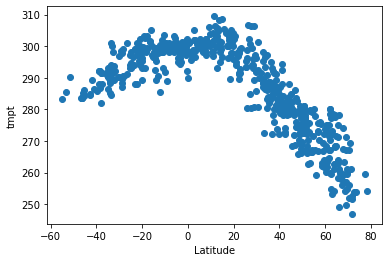

In [29]:
#Latitude vs temperature plot

plt.scatter(ltd,tmpt)

plt.xlabel('Latitude')
plt.ylabel('tmpt')
plt.savefig('plot1.png')
plt.show()

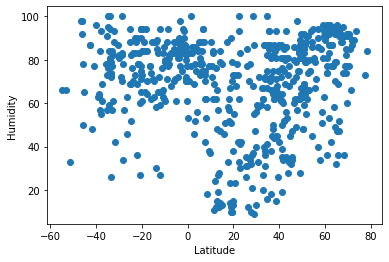

In [30]:
#Latitude vs humidity plot

plt.scatter(ltd,hmd)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('plot2.png')
plt.show()

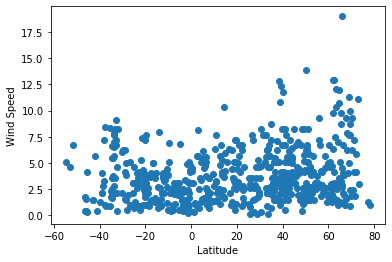

In [31]:
#Latitude vs wind speed plot

plt.scatter(ltd,wnd)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('plot3.png')
plt.show()

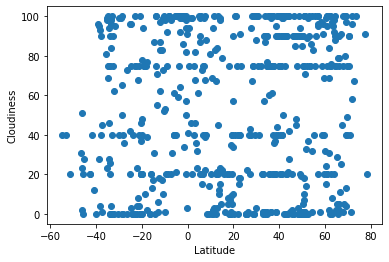

In [32]:
#Latitude vs cloudiness speed plot

plt.scatter(ltd,cld)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('plot4.png')
plt.show()

In [33]:
#setting condition to get only northern hemisphere cities
north=weather_data[weather_data.Latitude >= 0]
north

,Cities,Latitude,Cloudiness,Humidity,Temperature,Wind Speed
2,klaksvik,62.23,100,87,280.15,12.90
6,kyra,49.58,19,67,268.74,1.90
11,vista hermosa,19.52,40,10,301.21,7.20
12,agadez,19.75,10,13,302.18,1.12
13,saskylakh,71.92,96,89,251.53,5.89
...,...,...,...,...,...,...
581,williams lake,52.14,75,62,266.15,4.60
582,orlik,52.52,37,74,262.61,1.58
583,kushiro,42.98,100,86,279.79,7.24
584,mehtar lam,34.67,1,100,283.15,0.68


rvalue    = -0.911
r-squared = 0.83


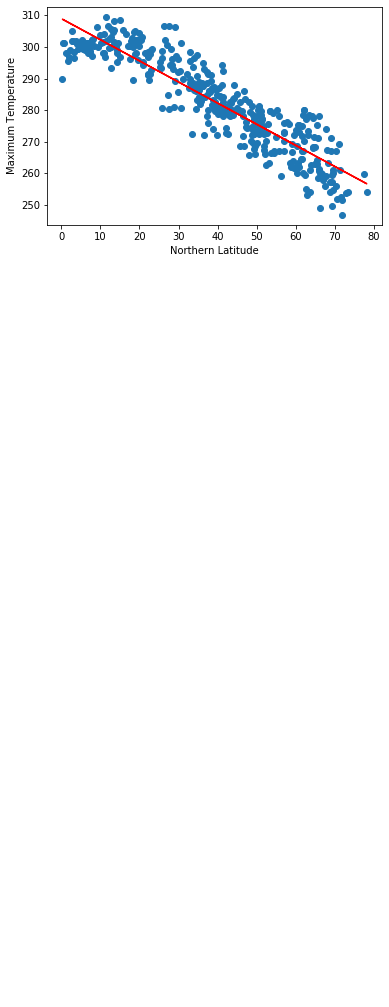

In [34]:

#Northern Max Temp vs. Latitude Linear Regression
max_temp=north['Temperature']
north_lat=north['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, max_temp)

regress_values = north_lat * slope + intercept
line_eq = "max_temp = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(north_lat, max_temp)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel("Maximum Temperature")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

In [35]:

#setting condition to get only southern hemisphere cities
south=weather_data[weather_data.Latitude < 0]
south

,Cities,Latitude,Cloudiness,Humidity,Temperature,Wind Speed
0,punta arenas,-53.15,40,66,285.61,4.60
1,hermanus,-34.42,46,84,289.82,6.60
3,sao joao da barra,-21.64,8,78,299.63,3.10
4,hualmay,-11.10,83,65,298.23,3.80
5,cape town,-33.93,20,77,289.74,7.70
...,...,...,...,...,...,...
563,ipira,-12.16,62,59,300.29,3.58
568,lyantonde,-0.40,91,61,292.21,0.45
569,bealanana,-14.55,87,70,292.35,0.71
577,tulagi,-9.10,75,88,299.15,2.10


rvalue    = 0.724
r-squared = 0.524


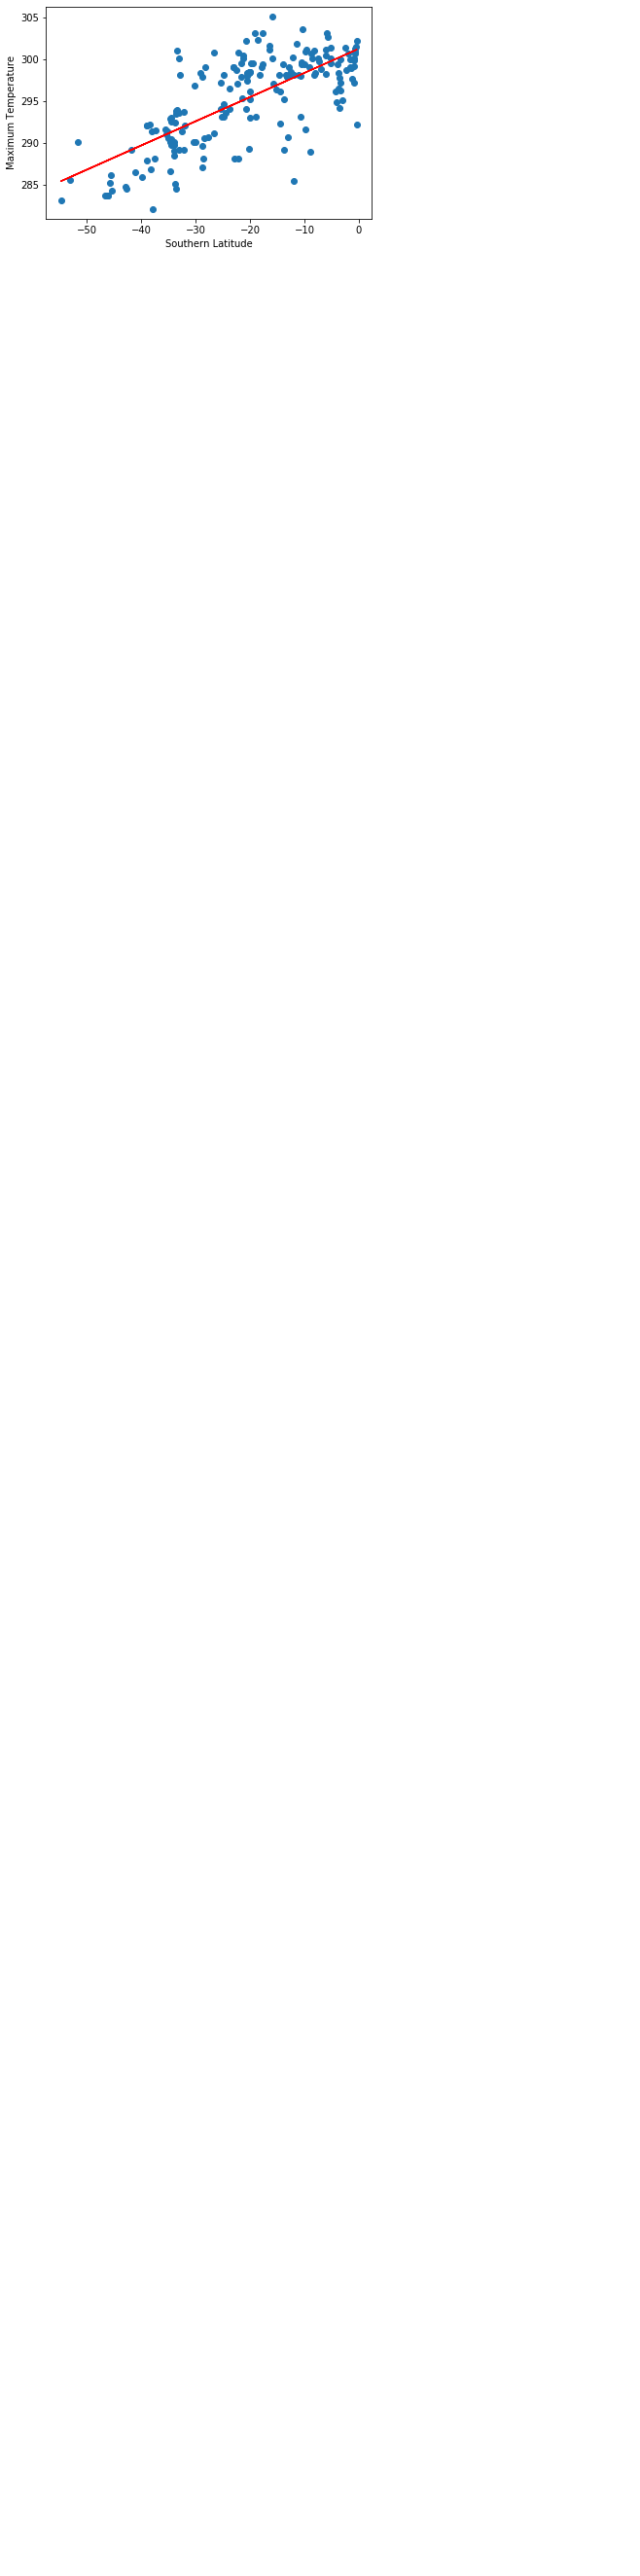

In [36]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
max_temp_south=south['Temperature']
south_lat=south['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, max_temp_south)

regress_values = south_lat * slope + intercept
line_eq = "max_temp_south = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(south_lat, max_temp_south)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel("Maximum Temperature")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

rvalue    = 0.119
r-squared = 0.014


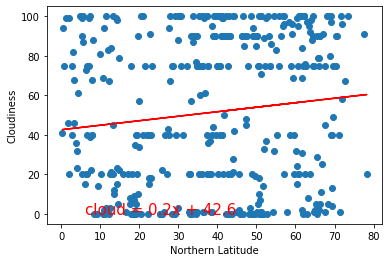

In [37]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
north_lat=north['Latitude']
cloud=north['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, cloud)

regress_values = north_lat * slope + intercept
line_eq = "cloud = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(north_lat, cloud)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel("Cloudiness")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

rvalue    = 0.268
r-squared = 0.072


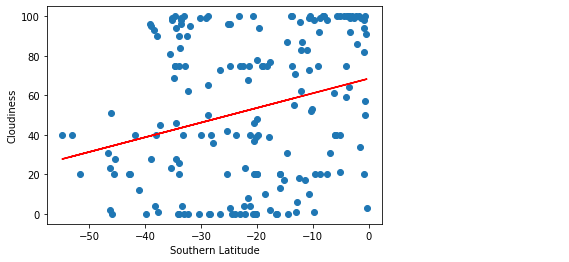

In [38]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_lat=south['Latitude']
cloud2=south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, cloud2)

regress_values = south_lat * slope + intercept
line_eq = "cloud2 = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(south_lat, cloud2)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel("Cloudiness")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

rvalue    = 0.193
r-squared = 0.037


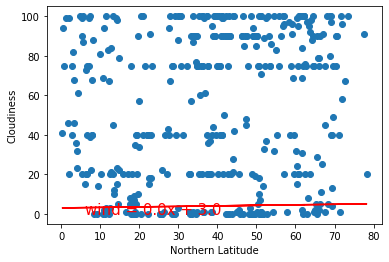

In [39]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_lat=north['Latitude']
wind=north['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, wind)

regress_values = north_lat * slope + intercept
line_eq = "wind = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(north_lat, cloud)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel("Cloudiness")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

rvalue    = -0.225
r-squared = 0.05


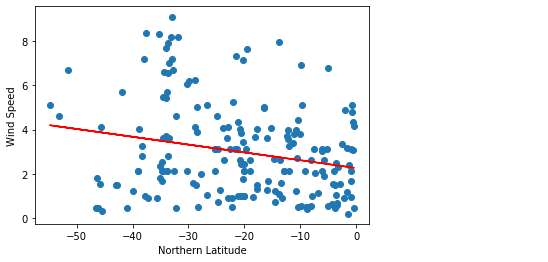

In [40]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_lat=south['Latitude']
wind2=south['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, wind2)

regress_values = south_lat * slope + intercept
line_eq = "wind2 = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(south_lat, wind2)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel("Wind Speed")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()